In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load Tesla stock data
data = pd.read_csv(r"C:\Users\INDIA\Downloads\TSLA.csv")

# Convert 'Date' to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# We'll work only with the 'Close' prices
close_prices = data[['Close']]

In [126]:
print(data.head(),'\n')

print(data.info(),'\n')

print(data.isnull().sum(),'\n')

print(data.drop_duplicates(inplace=True),'\n')

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 K

In [56]:
# Normalize the Close Prices
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)


In [57]:
#Create Time-Series Sequences
def create_dataset(series, window):
    X, y = [], []
    for i in range(window, len(series)):
        X.append(series[i - window:i, 0])
        y.append(series[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_dataset(scaled_close, window_size)

# Reshape X to be [samples, time steps, features] for RNN/LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))


In [58]:
#Train-Test Split
split_index = int(len(X) * 0.8)

X_train = X[:split_index]
y_train = y[:split_index]

X_test = X[split_index:]
y_test = y[split_index:]

#Callbacks,Modelcheckpoint for Saving Best Models
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_rnn = ModelCheckpoint("best_rnn_model.h5", monitor='val_loss', save_best_only=True)
checkpoint_lstm = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True)

In [59]:
#Build SimpleRNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(window_size, 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

rnn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stop, checkpoint_rnn])

Epoch 1/30


C:\Users\INDIA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0113

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0111 - val_loss: 9.8797e-04
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 3.1354e-04
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.4733e-04 - val_loss: 3.2392e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.0244e-04 - val_loss: 6.5311e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.4624e-04 - val_loss: 3.6094e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.8031e-04 - val_loss: 5.4211e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.5418e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5395e-04 - val_loss: 2.5360e-04
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.6355e-04 - val_loss: 3.4499e-04
Epoch 9/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.1583e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.1474e-04 - val_loss: 2.1778e-04
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.2601e-04 - val_loss: 2.7540e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.6993e-04 - val_loss: 2.2242e-04
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2573e-04 - val_loss: 4.5133e-04
Epoch 13/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6013e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5981e-04 - val_loss: 1.9796e-04
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.4825e-04 - val_loss: 2.4239e-04
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2855e-04 - val_loss: 2.0613e-04
Epoch 16/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.4774e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.4576e-04 - val_loss: 1.8527e-04
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4380e-04 - val_loss: 2.1372e-04
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8805e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.8776e-04 - val_loss: 1.7126e-04
Epoch 19/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7432e-04 - val_loss: 1.7974e-04
Epoch 20/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8112e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.7893e-04 - val_loss: 1.7028e-04
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8812e-04 - val_loss: 1.7808e-04
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.2685e-04 - val_loss: 1.8533e-04
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4167e-04 - val_loss: 3.2685e-04
Epoch 24/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.6283e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.6275e-04 - val_loss: 1.6010e-04
Epoch 25/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4539e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4535e-04 - val_loss: 1.5813e-04
Epoch 26/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.3593e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.3612e-04 - val_loss: 1.5408e-04
Epoch 27/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.3483e-04 - val_loss: 2.3253e-04
Epoch 28/30
50/53 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.2847e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2869e-04 - val_loss: 1.4883e-04
Epoch 29/30
51/53 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.5067e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.4938e-04 - val_loss: 1.4733e-04
Epoch 30/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.0432e-04 - val_loss: 1.5445e-04


In [60]:
#Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, callbacks=[early_stop, checkpoint_lstm])

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0078

53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0077 - val_loss: 3.5376e-04
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.0719e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.0758e-04 - val_loss: 3.3167e-04
Epoch 3/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.8237e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.8147e-04 - val_loss: 3.2898e-04
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.8573e-04 - val_loss: 3.5115e-04
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.6901e-04 - val_loss: 3.8550e-04
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4.1002e-04 - val_loss: 4.0562e-04
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.3602e-04 - val_loss: 4.2678e-04
Epoch 8/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1981e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.1973e-04 - val_loss: 3.1327e-04
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.1337e-04 - val_loss: 3.6895e-04
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.9687e-04 - val_loss: 3.2931e-04
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.4947e-04 - val_loss: 3.7199e-04
Epoch 12/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.9020e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.9022e-04 - val_loss: 3.0988e-04
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.8280e-04 - val_loss: 4.3145e-04
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3.0224e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 3.0205e-04 - val_loss: 2.9580e-04
Epoch 15/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.9615e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.9580e-04 - val_loss: 2.8705e-04
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.7634e-04 - val_loss: 3.4403e-04
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.7384e-04 - val_loss: 3.2226e-04
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.4887e-04 - val_loss: 2.8820e-04
Epoch 19/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.6017e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.5972e-04 - val_loss: 2.7067e-04
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.4741e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.4748e-04 - val_loss: 2.6537e-04
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 2.5901e-04 - val_loss: 2.7183e-04
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.2264e-04 - val_loss: 3.3158e-04
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.6008e-04 - val_loss: 2.6909e-04
Epoch 24/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2.3662e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.3682e-04 - val_loss: 2.6221e-04
Epoch 25/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.1424e-04 - val_loss: 2.6718e-04
Epoch 26/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.2197e-04 - val_loss: 3.3846e-04
Epoch 27/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2.1602e-04

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.1569e-04 - val_loss: 2.4234e-04
Epoch 28/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 2.0980e-04 - val_loss: 2.5170e-04
Epoch 29/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.1532e-04 - val_loss: 2.6583e-04
Epoch 30/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.6139e-04 - val_loss: 2.7018e-04


In [61]:
#Load the Best Models Saved
best_rnn = load_model("best_rnn_model.h5")
best_lstm = load_model("best_lstm_model.h5")

#Predictions
rnn_pred = best_rnn.predict(X_test)
lstm_pred = best_lstm.predict(X_test)

#Inverse transform predictions and actual values
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


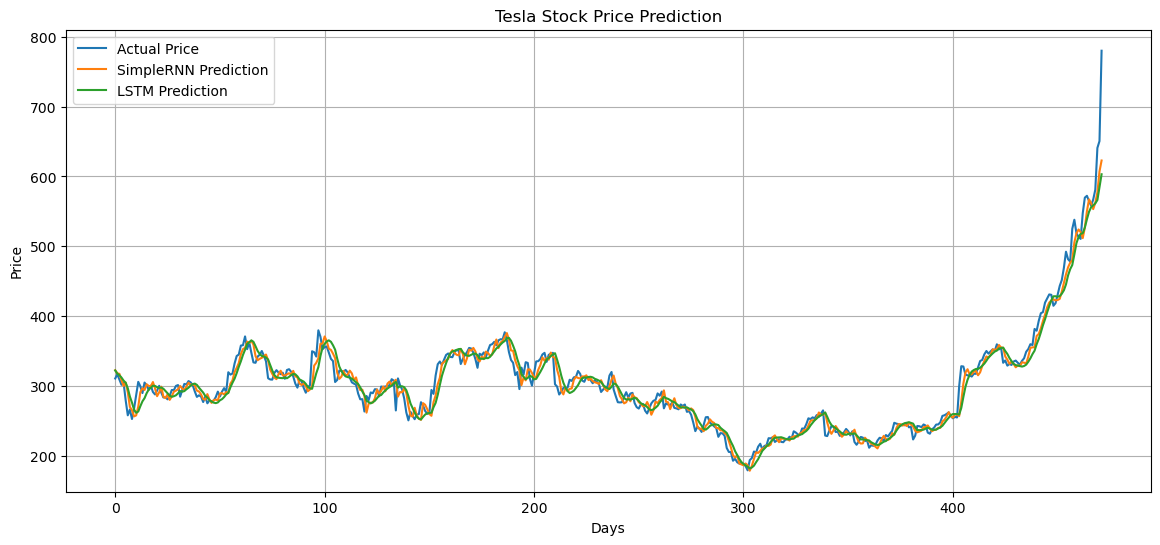

In [62]:
#Plotting Predictions vs Actual Prices
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(rnn_pred_inv, label='SimpleRNN Prediction')
plt.plot(lstm_pred_inv, label='LSTM Prediction')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [63]:
rnn_mse = mean_squared_error(y_test_inv, rnn_pred_inv)
lstm_mse = mean_squared_error(y_test_inv, lstm_pred_inv)

print("SimpleRNN MSE:", rnn_mse)
print("LSTM MSE:", lstm_mse)

SimpleRNN MSE: 221.52402173497597
LSTM MSE: 323.8876771412387


In [78]:
#Since SimpleRNN Model has lower score for MSE, it is better for predictions